<a href="https://colab.research.google.com/github/AravindYadav10/Complete-Python-3-Bootcamp/blob/master/BTC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [4]:
# Load data
from google.colab import files
uploaded = files.upload()

Saving BTC.csv to BTC.csv


In [5]:
#store the data
BTC = pd.read_csv('BTC.csv')
#show the data
BTC

,Date,Open,High,Low,Close,Adj Close,Volume
0,03-02-2015,237.453995,245.957001,224.483002,227.268005,227.268005,4.078370e+07
1,04-02-2015,227.511002,230.057999,221.113007,226.852997,226.852997,2.659430e+07
2,05-02-2015,227.664993,239.404999,214.725006,217.110992,217.110992,2.251640e+07
3,06-02-2015,216.923004,230.509995,216.231995,222.266006,222.266006,2.443530e+07
4,07-02-2015,222.632996,230.298996,222.606995,227.753998,227.753998,2.160420e+07
...,...,...,...,...,...,...,...
2553,30-01-2022,38151.917970,38266.339840,37437.710940,37917.601560,37917.601560,1.464355e+10
2554,31-01-2022,37920.281250,38647.261720,36733.574220,38483.125000,38483.125000,2.073473e+10
2555,01-02-2022,38481.765630,39115.132810,38113.664060,38743.273440,38743.273440,2.028850e+10
2556,02-02-2022,NaN,NaN,NaN,NaN,NaN,NaN


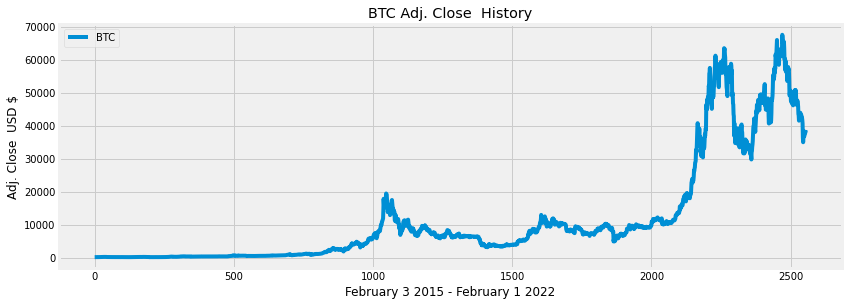

In [6]:
#visualize the data

plt.figure(figsize=(12.5,4.5))
plt.plot(BTC['Adj Close'],label = 'BTC')
plt.title('BTC Adj. Close  History')
plt.xlabel('February 3 2015 - February 1 2022')
plt.ylabel('Adj. Close  USD $')
plt.legend(loc='upper left')
plt.show()

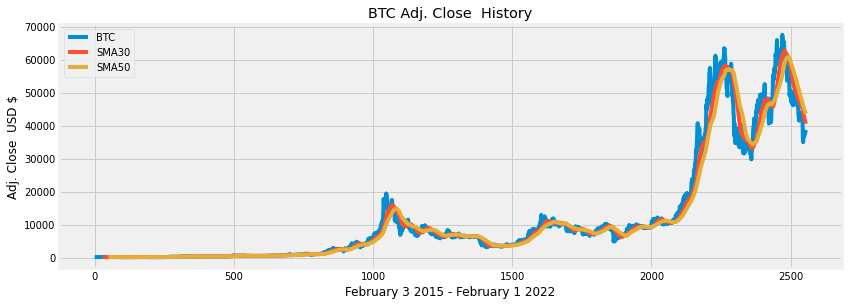

In [19]:
#visualize the data
#visualize the data
plt.figure(figsize=(12.5,4.5))
plt.plot(BTC['Adj Close'],label = 'BTC')
plt.plot(SMA30 ['Adj Close'],label = 'SMA30')
plt.plot(SMA50['Adj Close'],label = 'SMA50')
plt.title('BTC Adj. Close  History')
plt.xlabel('February 3 2015 - February 1 2022')
plt.ylabel('Adj. Close  USD $')
plt.legend(loc='upper left')
plt.show()

In [9]:
#Create a simple moving average with a thirty day window
SMA30 = pd.DataFrame()
SMA30['Adj Close'] = BTC['Adj Close'].rolling(window= 30).mean()
SMA30

,Adj Close
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
2553,41202.132293
2554,40895.342709
2555,40608.611199
2556,NaN


In [18]:
#Create a simple moving average with a FIFTY day window
SMA50 = pd.DataFrame()
SMA50['Adj Close'] = BTC['Adj Close'].rolling(window= 50).mean()
SMA50

,Adj Close
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
2553,44025.651407
2554,43793.347188
2555,43633.463048
2556,NaN


In [21]:
#Create a new data frame to store all the data
data = pd.DataFrame()
data['BTC']=BTC['Adj Close']
data['SMA30']=SMA30['Adj Close']
data['SMA50']=SMA50['Adj Close']
data

,BTC,SMA30,SMA50
0,227.268005,NaN,NaN
1,226.852997,NaN,NaN
2,217.110992,NaN,NaN
3,222.266006,NaN,NaN
4,227.753998,NaN,NaN
...,...,...,...
2553,37917.601560,41202.132293,44025.651407
2554,38483.125000,40895.342709,43793.347188
2555,38743.273440,40608.611199,43633.463048
2556,NaN,NaN,NaN


In [22]:
#create a function to signal when to buy /sell a asset
def buy_sell(data):
  sigPriceBuy = []
  sigPriceSell=[]
  flag = -1

  for i in range(len(data)):
    if data['SMA30'][i] > data['SMA50'][i]:
      if flag != 1:
        sigPriceBuy.append(data['BTC'][i])
        sigPriceSell.append(np.nan)
        flag = 1
      else:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(np.nan)
    elif data['SMA30'][i] < data['SMA50'][i]:
      if flag != 0:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(data['BTC'][i])
        flag = 0
      else:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(np.nan)
    else:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(np.nan)

  return (sigPriceBuy, sigPriceSell)

In [23]:
#store the buy and sell data into a variable
buy_sell = buy_sell(data)
data['Buy_Signal_Price'] = buy_sell[0]
data['Sell_Signal_Price'] = buy_sell[1]

In [24]:
#show the data
data

,BTC,SMA30,SMA50,Buy_Signal_Price,Sell_Signal_Price
0,227.268005,NaN,NaN,NaN,NaN
1,226.852997,NaN,NaN,NaN,NaN
2,217.110992,NaN,NaN,NaN,NaN
3,222.266006,NaN,NaN,NaN,NaN
4,227.753998,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2553,37917.601560,41202.132293,44025.651407,NaN,NaN
2554,38483.125000,40895.342709,43793.347188,NaN,NaN
2555,38743.273440,40608.611199,43633.463048,NaN,NaN
2556,NaN,NaN,NaN,NaN,NaN


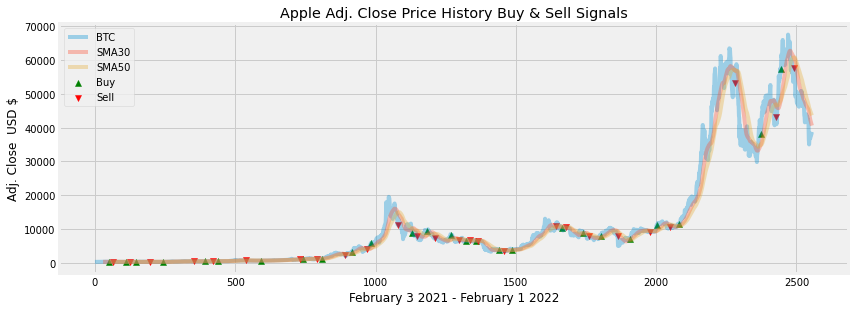

In [26]:
#Visualize the data and the strategy to buy and sell the stock
plt.figure(figsize=(12.6,4.6))
plt.plot(data['BTC'],label ='BTC',alpha = 0.35)
plt.plot(data['SMA30'],label = 'SMA30', alpha = 0.35)
plt.plot(data['SMA50'],label = 'SMA50',alpha = 0.35)
plt.scatter(data.index, data['Buy_Signal_Price'],label = 'Buy',marker = '^',color = 'green')
plt.scatter(data.index, data['Sell_Signal_Price'],label = 'Sell', marker = 'v', color = 'red')
plt.title('Apple Adj. Close Price History Buy & Sell Signals')
plt.xlabel('February 3 2021 - February 1 2022')
plt.ylabel('Adj. Close  USD $')
plt.legend(loc='upper left')
plt.show()
